In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import losses
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, AveragePooling2D, Dropout, BatchNormalization, Activation, SeparableConv2D, add
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.regularizers import l2
from keras import backend as K




In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing The Data

X_train_path = '/content/drive/My Drive/Colab Notebooks/EX2/data/X_train.npy'
Y_train_path = '/content/drive/My Drive/Colab Notebooks/EX2/data/Y_train.npy'
X_test_path = '/content/drive/My Drive/Colab Notebooks/EX2/data/X_test.npy'
Y_test_path = '/content/drive/My Drive/Colab Notebooks/EX2/data/Y_test.npy'
X_train = np.load(X_train_path)
Y_train = np.load(Y_train_path)
X_test = np.load(X_test_path)
Y_test = np.load(Y_test_path)

print('Shape of X_train is:', X_train.shape)
print('Shape of Y_train is:', Y_train.shape)
print('Shape of X_test is:', X_test.shape)
print('Shape of Y_test is:', Y_test.shape)

Shape of X_train is: (3200, 180, 180, 3)
Shape of Y_train is: (3200,)
Shape of X_test is: (800, 180, 180, 3)
Shape of Y_test is: (800,)


Labels in the data set: [0. 1.]
Number of dogs in the train set: 1622.0
Number of cats in the train set: 1578.0

First picture image and its label:
1.0


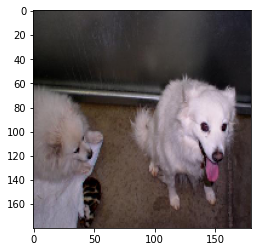

In [5]:
print("Labels in the data set:", np.unique(Y_train))
print("Number of dogs in the train set:", np.sum(Y_train))
print("Number of cats in the train set:", Y_train.shape[0] - np.sum(Y_train))

print("\nFirst picture image and its label:")
print(Y_train[0])
plt.imshow(X_train.astype(int)[0])

# From that we learn that '1' label stands for Dogs and '0' for cats and that the data is balanced (labels count)

In [6]:
# Data Normalization

X_train = X_train / 255.0
X_test = X_test / 255.0

# verifying The Normalization
np.min(X_train), np.max(X_train), X_train.dtype

(0.0, 1.0, dtype('float64'))

In [7]:
# Creating Validation Set

X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.2, random_state=1234, stratify=Y_train)

print('Shape of X_train is:', X_train.shape)
print('Shape of Y_train is:', Y_train.shape)
print('Shape of X_validation is:', X_validation.shape)
print('Shape of Y_validation is:', Y_validation.shape)

Shape of X_train is: (2560, 180, 180, 3)
Shape of Y_train is: (2560,)
Shape of X_validation is: (640, 180, 180, 3)
Shape of Y_validation is: (640,)


In [8]:
# Set seed in order to maintain the same models and results
tf.random.set_seed(1234)

In [9]:
train_scores = {}
test_scores = {}
trainable_params = {}
layers = {}
epochs = {}
loss_function = {}
optimizer = {}

In [10]:
# Building The First Network

Basic_CNN = Sequential()
Basic_CNN.add(Input(shape=(180, 180, 3)))

Basic_CNN.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"))
Basic_CNN.add(BatchNormalization())
Basic_CNN.add(MaxPooling2D(pool_size=(3, 3)))

Basic_CNN.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
Basic_CNN.add(BatchNormalization())
Basic_CNN.add(MaxPooling2D(pool_size=(3, 3)))

Basic_CNN.add(Conv2D(64, kernel_size=(3, 3), kernel_regularizer=l2(0.001),  padding="same", activation="relu"))
Basic_CNN.add(BatchNormalization())

Basic_CNN.add(Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu"))
Basic_CNN.add(BatchNormalization())
Basic_CNN.add(MaxPooling2D(pool_size=(2, 2)))

Basic_CNN.add(Dense(128,activation="relu"))
Basic_CNN.add(BatchNormalization())
Basic_CNN.add(Dropout(0.4))
Basic_CNN.add(Flatten())
Basic_CNN.add(Dense(1, activation="sigmoid"))

In [11]:
Basic_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 60, 60, 64)       256       
 hNormalization)                                                 
                                                        

In [12]:
save_model = ModelCheckpoint(
    filepath='/content/drive/My Drive/Colab Notebooks/EX2/first_conv_model',
    save_best_only=True,
    monitor='val_loss',
    verbose=1,
    mode='min'
)


reduce_lr = ReduceLROnPlateau(
    monitor="val_accuracy",
    factor=0.7,
    patience=6
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=10**-7,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

callbacks = [save_model, reduce_lr]


In [13]:
trainable_params['Basic_CNN'] = 160,321
layers['Basic_CNN'] = len(Basic_CNN.layers)
epochs_1 = 20 
epochs['Basic_CNN'] = epochs_1
loss_function['Basic_CNN'] = 'BinaryCrossentropy'
optimizer['Basic_CNN'] = 'adam'

In [14]:
Basic_CNN.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])
Basic_CNN.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), batch_size=64, epochs= epochs_1, callbacks=callbacks)

Epoch 1/20
40/40 [==============================] - ETA: 0s - loss: 0.9437 - accuracy: 0.6016
Epoch 1: val_loss improved from inf to 0.78178, saving model to /content/drive/My Drive/Colab Notebooks/EX2/first_conv_model


40/40 [==============================] - 151s 4s/step - loss: 0.9437 - accuracy: 0.6016 - val_loss: 0.7818 - val_accuracy: 0.4938 - lr: 0.0010
Epoch 2/20
40/40 [==============================] - ETA: 0s - loss: 0.7408 - accuracy: 0.7102
Epoch 2: val_loss did not improve from 0.78178
40/40 [==============================] - 155s 4s/step - loss: 0.7408 - accuracy: 0.7102 - val_loss: 0.8441 - val_accuracy: 0.4938 - lr: 0.0010
Epoch 3/20
40/40 [==============================] - ETA: 0s - loss: 0.5511 - accuracy: 0.7824
Epoch 3: val_loss did not improve from 0.78178
40/40 [==============================] - 146s 4s/step - loss: 0.5511 - accuracy: 0.7824 - val_loss: 1.6146 - val_accuracy: 0.4938 - lr: 0.0010
Epoch 4/20
40/40 [==============================] - ETA: 0s - loss: 0.4706 - accuracy: 0.8309
Epoch 4: val_loss did not improve from 0.78178
40/40 [==============================] - 145s 4s/step - loss: 0.4706 - accuracy: 0.8309 - val_loss: 1.2989 - val_accuracy: 0.4938 - lr: 0.0010
Epoch

In [15]:
pred_model_train = Basic_CNN.predict(X_train, verbose=1)
pred_model_train_labels = np.round(pred_model_train)

80/80 [==============================] - 34s 421ms/step


In [16]:
first_model_train_score = accuracy_score(Y_train ,pred_model_train_labels)
train_scores['Basic_CNN'] = first_model_train_score
first_model_train_score

0.97734375

In [17]:
pred_model_test = Basic_CNN.predict(X_test, verbose=1)
pred_model_test_labels = np.round(pred_model_test)

25/25 [==============================] - 11s 418ms/step


In [18]:
first_model_test_score = accuracy_score(Y_test ,pred_model_test_labels)
test_scores['Basic_CNN'] = first_model_test_score
first_model_test_score

0.7525

#"My Model"

In [19]:
inputs = Input(shape=(180, 180, 3))
y = 1
# Entry block
x = Conv2D(32, 3, padding="same")(inputs)
x = BatchNormalization()(x)
x = Activation("relu")(x)

for filters in [32, 64, 64, 128, 64, 64, 32]:
  y = y+1
  x = Activation("relu")(x)
  x = Conv2D(filters, 3, padding="same")(x)
  x = BatchNormalization()(x)

  if( y % 2 == 0 ):
    x = MaxPooling2D(2, padding="same")(x)
    x = Dropout(rate= 0.2)(x)

x = Dense(10, activation= 'relu')(x)
x = Dropout(rate= 0.2)(x)
x = Flatten()(x)
x = Dense(1, activation= 'sigmoid')(x)



In [20]:
my_model = tf.keras.models.Model(inputs=[inputs], outputs=[x])
my_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_5 (Batc  (None, 180, 180, 32)     128       
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 180, 180, 32)      0         
                                                                 
 activation_1 (Activation)   (None, 180, 180, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      9248      
                                                             

In [21]:
epochs_2 = 24
trainable_params['my_model'] = 271,339
layers['my_model'] = len(my_model.layers)
epochs['my_model'] = epochs_2
loss_function['my_model'] = 'BinaryCrossentropy'
optimizer['my_model'] = 'adam'

In [22]:
my_model.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])
my_model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), batch_size=64, epochs=epochs_2, callbacks=callbacks)

Epoch 1/24
40/40 [==============================] - ETA: 0s - loss: 0.7468 - accuracy: 0.5672 
Epoch 1: val_loss improved from 0.78178 to 0.69180, saving model to /content/drive/My Drive/Colab Notebooks/EX2/first_conv_model


40/40 [==============================] - 686s 17s/step - loss: 0.7468 - accuracy: 0.5672 - val_loss: 0.6918 - val_accuracy: 0.5016 - lr: 0.0010
Epoch 2/24
40/40 [==============================] - ETA: 0s - loss: 0.6699 - accuracy: 0.5930 
Epoch 2: val_loss did not improve from 0.69180
40/40 [==============================] - 682s 17s/step - loss: 0.6699 - accuracy: 0.5930 - val_loss: 0.8878 - val_accuracy: 0.4938 - lr: 0.0010
Epoch 3/24
40/40 [==============================] - ETA: 0s - loss: 0.6274 - accuracy: 0.6313 
Epoch 3: val_loss did not improve from 0.69180
40/40 [==============================] - 677s 17s/step - loss: 0.6274 - accuracy: 0.6313 - val_loss: 0.8618 - val_accuracy: 0.4938 - lr: 0.0010
Epoch 4/24
40/40 [==============================] - ETA: 0s - loss: 0.6101 - accuracy: 0.6500 
Epoch 4: val_loss improved from 0.69180 to 0.66568, saving model to /content/drive/My Drive/Colab Notebooks/EX2/first_conv_model


40/40 [==============================] - 682s 17s/step - loss: 0.6101 - accuracy: 0.6500 - val_loss: 0.6657 - val_accuracy: 0.5938 - lr: 0.0010
Epoch 5/24
40/40 [==============================] - ETA: 0s - loss: 0.5870 - accuracy: 0.6773 
Epoch 5: val_loss did not improve from 0.66568
40/40 [==============================] - 677s 17s/step - loss: 0.5870 - accuracy: 0.6773 - val_loss: 0.9775 - val_accuracy: 0.4938 - lr: 0.0010
Epoch 6/24
40/40 [==============================] - ETA: 0s - loss: 0.5586 - accuracy: 0.7141 
Epoch 6: val_loss did not improve from 0.66568
40/40 [==============================] - 668s 17s/step - loss: 0.5586 - accuracy: 0.7141 - val_loss: 1.0252 - val_accuracy: 0.4938 - lr: 0.0010
Epoch 7/24
40/40 [==============================] - ETA: 0s - loss: 0.5372 - accuracy: 0.7273 
Epoch 7: val_loss did not improve from 0.66568
40/40 [==============================] - 672s 17s/step - loss: 0.5372 - accuracy: 0.7273 - val_loss: 0.7908 - val_accuracy: 0.5016 - lr: 0.001

40/40 [==============================] - 669s 17s/step - loss: 0.4753 - accuracy: 0.7672 - val_loss: 0.6327 - val_accuracy: 0.6781 - lr: 0.0010
Epoch 12/24
40/40 [==============================] - ETA: 0s - loss: 0.4530 - accuracy: 0.7855 
Epoch 12: val_loss did not improve from 0.63273
40/40 [==============================] - 673s 17s/step - loss: 0.4530 - accuracy: 0.7855 - val_loss: 0.6959 - val_accuracy: 0.6609 - lr: 0.0010
Epoch 13/24
40/40 [==============================] - ETA: 0s - loss: 0.4546 - accuracy: 0.7879 
Epoch 13: val_loss did not improve from 0.63273
40/40 [==============================] - 670s 17s/step - loss: 0.4546 - accuracy: 0.7879 - val_loss: 0.6810 - val_accuracy: 0.6672 - lr: 0.0010
Epoch 14/24
40/40 [==============================] - ETA: 0s - loss: 0.4326 - accuracy: 0.8008 
Epoch 14: val_loss did not improve from 0.63273
40/40 [==============================] - 666s 17s/step - loss: 0.4326 - accuracy: 0.8008 - val_loss: 0.9222 - val_accuracy: 0.6219 - lr:

40/40 [==============================] - 669s 17s/step - loss: 0.4252 - accuracy: 0.8055 - val_loss: 0.5193 - val_accuracy: 0.7594 - lr: 0.0010
Epoch 16/24
40/40 [==============================] - ETA: 0s - loss: 0.3996 - accuracy: 0.8215 
Epoch 16: val_loss improved from 0.51931 to 0.47823, saving model to /content/drive/My Drive/Colab Notebooks/EX2/first_conv_model


40/40 [==============================] - 667s 17s/step - loss: 0.3996 - accuracy: 0.8215 - val_loss: 0.4782 - val_accuracy: 0.7609 - lr: 0.0010
Epoch 17/24
40/40 [==============================] - ETA: 0s - loss: 0.3809 - accuracy: 0.8297 
Epoch 17: val_loss did not improve from 0.47823
40/40 [==============================] - 664s 17s/step - loss: 0.3809 - accuracy: 0.8297 - val_loss: 1.4429 - val_accuracy: 0.5813 - lr: 0.0010
Epoch 18/24
40/40 [==============================] - ETA: 0s - loss: 0.3626 - accuracy: 0.8309 
Epoch 18: val_loss did not improve from 0.47823
40/40 [==============================] - 672s 17s/step - loss: 0.3626 - accuracy: 0.8309 - val_loss: 0.7201 - val_accuracy: 0.7125 - lr: 0.0010
Epoch 19/24
40/40 [==============================] - ETA: 0s - loss: 0.3528 - accuracy: 0.8406 
Epoch 19: val_loss did not improve from 0.47823
40/40 [==============================] - 669s 17s/step - loss: 0.3528 - accuracy: 0.8406 - val_loss: 0.6453 - val_accuracy: 0.7437 - lr:

In [23]:
pred_my_model_train = my_model.predict(X_train, verbose=1)
pred_my_model_train_labels = np.round(pred_my_model_train)

80/80 [==============================] - 142s 2s/step


In [24]:
my_model_train_score = accuracy_score(Y_train, pred_my_model_train_labels)
my_model_train_score

0.769140625

In [25]:
pred_my_model_test = my_model.predict(X_test, verbose=1)
pred_my_model_test_labels = np.round(pred_my_model_test)

25/25 [==============================] - 44s 2s/step


In [26]:
my_model_test_score = accuracy_score(Y_test, pred_my_model_test_labels)
my_model_test_score

0.71875

In [27]:
train_scores['my_model'] = my_model_train_score
test_scores['my_model'] = my_model_test_score

#Transfer Learning Model

In [28]:
base_model = tf.keras.applications.InceptionV3(input_shape=(180, 180, 3), include_top=False)


87910968/87910968 [==============================] - 1s 0us/step


In [29]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 89, 89, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_13 (BatchN  (None, 89, 89, 32)  96          ['conv2d_12[0][0]']              
 ormalization)                                                                                    
                                                                                       

In [30]:
sub_model = tf.keras.models.Model(inputs=base_model.inputs, outputs=[base_model.get_layer('conv2d_74').output])
sub_model.trainable = False
sub_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 89, 89, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_13 (BatchN  (None, 89, 89, 32)  96          ['conv2d_12[0][0]']              
 ormalization)                                                                                    
                                                                                            

In [31]:
inputs = Input(shape=(180, 180, 3))
inception_output = sub_model(inputs)
x = Flatten()(inception_output)
x = Dense(1, activation = 'sigmoid')(x)
inception_model = tf.keras.models.Model(inputs=[inputs], outputs=[x])

In [32]:
inception_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 model_1 (Functional)        (None, 9, 9, 192)         7237472   
                                                                 
 flatten_2 (Flatten)         (None, 15552)             0         
                                                                 
 dense_4 (Dense)             (None, 1)                 15553     
                                                                 
Total params: 7,253,025
Trainable params: 15,553
Non-trainable params: 7,237,472
_________________________________________________________________


In [33]:
inception_model.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("cats_and_dogs_inceptionv3.h5", save_best_only=True)
]

epochs_3 = 20
inception_model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), callbacks=callbacks, batch_size=128, epochs = epochs_3)

Epoch 1/20
20/20 [==============================] - 168s 8s/step - loss: 0.2411 - accuracy: 0.8910 - val_loss: 0.1387 - val_accuracy: 0.9406
Epoch 2/20
20/20 [==============================] - 159s 8s/step - loss: 0.0865 - accuracy: 0.9688 - val_loss: 0.1378 - val_accuracy: 0.9406
Epoch 3/20
20/20 [==============================] - 159s 8s/step - loss: 0.0595 - accuracy: 0.9844 - val_loss: 0.1192 - val_accuracy: 0.9516
Epoch 4/20
20/20 [==============================] - 158s 8s/step - loss: 0.0436 - accuracy: 0.9914 - val_loss: 0.1208 - val_accuracy: 0.9469
Epoch 5/20
20/20 [==============================] - 161s 8s/step - loss: 0.0341 - accuracy: 0.9945 - val_loss: 0.1164 - val_accuracy: 0.9469
Epoch 6/20
20/20 [==============================] - 162s 8s/step - loss: 0.0275 - accuracy: 0.9984 - val_loss: 0.1154 - val_accuracy: 0.9547
Epoch 7/20
20/20 [==============================] - 159s 8s/step - loss: 0.0225 - accuracy: 0.9988 - val_loss: 0.1114 - val_accuracy: 0.9484
Epoch 8/20
20

In [34]:
# trainable_count = int(
#     np.sum([K.count_params(p) for p in set(inception_model.trainable_weights)]))
trainable_params['inception_model'] = 15,553
layers['inception_model'] = len(inception_model.layers)
epochs['inception_model'] = epochs_3
loss_function['inception_model'] = 'BinaryCrossentropy'
optimizer['inception_model'] = 'adam'

In [35]:
pred_inception_model_train = inception_model.predict(X_train, verbose=1)
pred_inception_model_train_labels = np.round(pred_inception_model_train)
inception_model_train_score = accuracy_score(Y_train ,pred_inception_model_train_labels)
inception_model_train_score

80/80 [==============================] - 132s 2s/step


1.0

In [36]:
pred_inception_model_test = inception_model.predict(X_test, verbose=1)
pred_inception_model_test_labels = np.round(pred_inception_model_test)
inception_model_test_score = accuracy_score(Y_test ,pred_inception_model_test_labels)
inception_model_test_score

25/25 [==============================] - 40s 2s/step


0.945

In [37]:
train_scores['inception_model'] = inception_model_train_score
test_scores['inception_model'] = inception_model_test_score

In [38]:
results = {'model': ['Basic CNN', 'My Model', 'InceptionV3'],
           'Test score (Accuracy)': [test_scores['Basic_CNN'], test_scores['my_model'], test_scores['inception_model']],
           'Train score (Accuracy)': [train_scores['Basic_CNN'], train_scores['my_model'], train_scores['inception_model']],
           'Number of trainable parameters': [trainable_params['Basic_CNN'], trainable_params['my_model'], trainable_params['inception_model']],
           'Number of layers': [layers['Basic_CNN'], layers['my_model'], layers['inception_model']],
           'Regularization methods': [['Dropout', 'BatchNormalization','l2'], ['BatchNormalization','Dropout'], ['Only the ones from the original model']],
           'Number of epochs': [epochs['Basic_CNN'], epochs['my_model'], epochs['inception_model']],
           'Loss function': [loss_function['Basic_CNN'], loss_function['my_model'], loss_function['inception_model']],
           'Optimizer': [optimizer['Basic_CNN'], optimizer['my_model'], optimizer['inception_model']]
           }

df = pd.DataFrame(results)
df

,model,Test score (Accuracy),Train score (Accuracy),Number of trainable parameters,Number of layers,Regularization methods,Number of epochs,Loss function,Optimizer
0,Basic CNN,0.75250,0.977344,"(160, 321)",16,"[Dropout, BatchNormalization, l2]",20,BinaryCrossentropy,adam
1,My Model,0.71875,0.769141,"(271, 339)",37,"[BatchNormalization, Dropout]",24,BinaryCrossentropy,adam
2,InceptionV3,0.94500,1.000000,"(15, 553)",4,[Only the ones from the original model],20,BinaryCrossentropy,adam


In [39]:
df.to_csv(os.path.join(os.getcwd(), 'exercise2.csv'))
df.to_csv("/content/drive/My Drive/Colab Notebooks/EX2/exercise2.csv")